<a href="https://colab.research.google.com/github/jialush/6189HW/blob/master/HW2_Wang_Jialu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

(a)



In [3]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name_a = 'keras_cifar10_trained_modela.h5'
model_name_b = 'keras_cifar10_trained_modelb.h5'
model_name_c = 'keras_cifar10_trained_modelc.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#simple dense neural network (sdnn), 0 hidden layers
model_sdnn_0 = Sequential()
model_sdnn_0.add(Flatten())
model_sdnn_0.add(Dense(num_classes))
model_sdnn_0.add(Activation('softmax'))

In [6]:
#simple dense neural network (sdnn), 1 hidden layer
model_sdnn_1 = Sequential()
model_sdnn_1.add(Flatten())
model_sdnn_1.add(Dense(512))
model_sdnn_1.add(Activation('relu'))
model_sdnn_1.add(Dropout(0.5))
model_sdnn_1.add(Dense(num_classes))
model_sdnn_1.add(Activation('softmax'))

In [7]:
#simple dense neural network (sdnn), 2 hidden layer
model_sdnn_2 = Sequential()
model_sdnn_2.add(Flatten())
model_sdnn_2.add(Dense(512))
model_sdnn_2.add(Activation('relu'))
model_sdnn_2.add(Dropout(0.5))
model_sdnn_2.add(Dense(512))
model_sdnn_2.add(Activation('relu'))
model_sdnn_2.add(Dropout(0.5))
model_sdnn_2.add(Dense(num_classes))
model_sdnn_2.add(Activation('softmax'))

In [8]:
#simple dense neural network (sdnn), 3 hidden layer
model_sdnn_3 = Sequential()
model_sdnn_3.add(Flatten())
model_sdnn_3.add(Dense(512))
model_sdnn_3.add(Activation('relu'))
model_sdnn_3.add(Dropout(0.5))
model_sdnn_3.add(Dense(512))
model_sdnn_3.add(Activation('relu'))
model_sdnn_3.add(Dropout(0.5))
model_sdnn_3.add(Dense(512))
model_sdnn_3.add(Activation('relu'))
model_sdnn_3.add(Dropout(0.5))
model_sdnn_3.add(Dense(num_classes))
model_sdnn_3.add(Activation('softmax'))

In [10]:
#simple dense neural network (sdnn), 4 hidden layer
model_sdnn_4 = Sequential()
model_sdnn_4.add(Flatten())
model_sdnn_4.add(Dense(512))
model_sdnn_4.add(Activation('relu'))
model_sdnn_4.add(Dropout(0.5))
model_sdnn_4.add(Dense(512))
model_sdnn_4.add(Activation('relu'))
model_sdnn_4.add(Dropout(0.5))
model_sdnn_4.add(Dense(512))
model_sdnn_4.add(Activation('relu'))
model_sdnn_4.add(Dropout(0.5))
model_sdnn_4.add(Dense(512))
model_sdnn_4.add(Activation('relu'))
model_sdnn_4.add(Dropout(0.5))
model_sdnn_4.add(Dense(num_classes))
model_sdnn_4.add(Activation('softmax'))

In [11]:
# cnn
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)
# Let's train the model using RMSprop
model_sdnn_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_sdnn_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model_sdnn_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model_sdnn_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model_sdnn_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
import time
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    model_sdnn_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    model_sdnn_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    model_sdnn_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    model_sdnn_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    model_sdnn_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    tic=time.time()
    history_model=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')
    
    tic=time.time()
    history_model_sdnn_0=model_sdnn_0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

    tic=time.time()
    history_model_sdnn_1=model_sdnn_1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

    tic=time.time()
    history_model_sdnn_2=model_sdnn_2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

    tic=time.time()
    history_model_sdnn_3=model_sdnn_3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

    tic=time.time()
    history_model_sdnn_4=model_sdnn_4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')


Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 263s 168ms/step - loss: 1.6265 - accuracy: 0.4069 - val_loss: 1.1859 - val_accuracy: 0.5802
Epoch 2/10
1563/1563 [==============================] - 263s 168ms/step - loss: 1.2662 - accuracy: 0.5501 - val_loss: 1.0599 - val_accuracy: 0.6324
Epoch 3/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.1301 - accuracy: 0.6050 - val_loss: 0.9463 - val_accuracy: 0.6788
Epoch 4/10
1563/1563 [==============================] - 265s 170ms/step - loss: 1.0620 - accuracy: 0.6307 - val_loss: 0.8639 - val_accuracy: 0.7053
Epoch 5/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.0266 - accuracy: 0.6450 - val_loss: 1.0044 - val_accuracy: 0.6734
Epoch 6/10
1563/1563 [==============================] - 268s 171ms/step - loss: 0.9993 - accuracy: 0.6590 - val_loss: 0.8888 - val_accuracy: 0.7128
E

In [15]:
# Save model and weights
import os
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name_a)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/saved_models/keras_cifar10_trained_modela.h5 


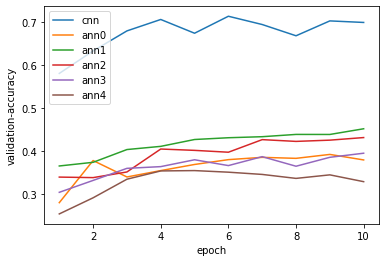

In [18]:
import matplotlib.pyplot as plt
epoch=range(1,(len(history_model.history['val_accuracy'])+1))
plt.plot(epoch,history_model.history['val_accuracy'])
plt.plot(epoch,history_model_sdnn_0.history['val_accuracy'])
plt.plot(epoch,history_model_sdnn_1.history['val_accuracy'])
plt.plot(epoch,history_model_sdnn_2.history['val_accuracy'])
plt.plot(epoch,history_model_sdnn_3.history['val_accuracy'])
plt.plot(epoch,history_model_sdnn_4.history['val_accuracy'])
plt.ylabel('validation-accuracy')
plt.xlabel('epoch')
plt.legend(['cnn','ann0','ann1','ann2','ann3','ann4'], loc='upper left')
plt.show()

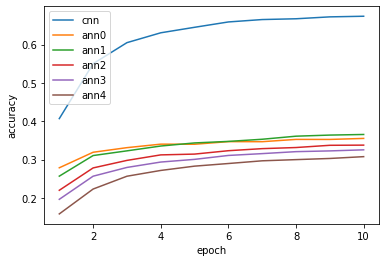

In [19]:
import matplotlib.pyplot as plt
epoch=range(1,(len(history_model.history['accuracy'])+1))
plt.plot(epoch,history_model.history['accuracy'])
plt.plot(epoch,history_model_sdnn_0.history['accuracy'])
plt.plot(epoch,history_model_sdnn_1.history['accuracy'])
plt.plot(epoch,history_model_sdnn_2.history['accuracy'])
plt.plot(epoch,history_model_sdnn_3.history['accuracy'])
plt.plot(epoch,history_model_sdnn_4.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn','ann0','ann1','ann2','ann3','ann4'], loc='upper left')
plt.show()

In [17]:
history_model.history['accuracy'],history_model.history['val_accuracy']
history_model_sdnn_0.history['accuracy'], history_model_sdnn_0.history['val_accuracy']
history_model_sdnn_1.history['accuracy'], history_model_sdnn_1.history['val_accuracy']
history_model_sdnn_2.history['accuracy'], history_model_sdnn_2.history['val_accuracy']
history_model_sdnn_3.history['accuracy'], history_model_sdnn_3.history['val_accuracy']
history_model_sdnn_4.history['accuracy'], history_model_sdnn_4.history['val_accuracy']

([0.1584399938583374,
  0.2232999950647354,
  0.25672000646591187,
  0.2718000113964081,
  0.28299999237060547,
  0.2898600101470947,
  0.2969200015068054,
  0.30000001192092896,
  0.30302000045776367,
  0.30776000022888184],
 [0.25429999828338623,
  0.29170000553131104,
  0.33480000495910645,
  0.3540000021457672,
  0.3547999858856201,
  0.35109999775886536,
  0.3458999991416931,
  0.3366999924182892,
  0.3449000120162964,
  0.32910001277923584])

Explain:
The convolutional network obtained the best results. The convolutional network is much better because it is sparse
with shared weights. This simplifies the optimization, while requiring less data to generalize well. As we increase
the number of dense hidden layers, the optimization is more difficult and unfortunately, the optimizer (rmsprop)
fails to find the best weights. Overfitting is not a problem since similar results are
observed for training accuracy and testing accuracy

(b)

In [20]:
# cnn-sigmoid
model_sig = Sequential()
model_sig.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(32, (3, 3)))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Conv2D(64, (3, 3), padding='same'))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(64, (3, 3)))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Flatten())
model_sig.add(Dense(512))
model_sig.add(Activation('sigmoid'))
model_sig.add(Dropout(0.5))
model_sig.add(Dense(num_classes))
model_sig.add(Activation('softmax'))
model_sig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
import time
if not data_augmentation:
    print('Not using data augmentation.')
    model_sig.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    tic=time.time()
    history_model_sig=model_sig.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')


Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 283s 181ms/step - loss: 2.3320 - accuracy: 0.0985 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 281s 180ms/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 283s 181ms/step - loss: 2.3065 - accuracy: 0.1007 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 284s 181ms/step - loss: 2.3059 - accuracy: 0.0979 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 285s 182ms/step - loss: 2.3053 - accuracy: 0.0992 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 293s 188ms/step - loss: 2.3052 - accuracy: 0.0992 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 287s 183ms/step - los

In [21]:
# Save model and weights
import os
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name_b)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_modelb.h5 


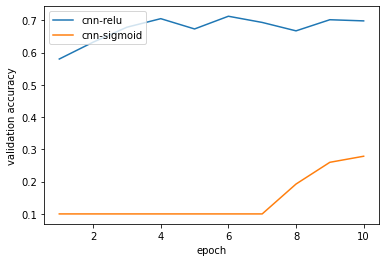

In [24]:
import matplotlib.pyplot as plt
epoch=range(1,(len(history_model.history['val_accuracy'])+1))
plt.plot(epoch,history_model.history['val_accuracy'])
plt.plot(epoch,history_model_sig.history['val_accuracy'])
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['cnn-relu', 'cnn-sigmoid'], loc='upper left')
plt.show()

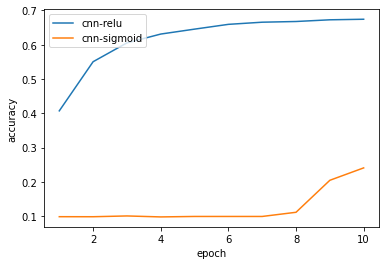

In [25]:
import matplotlib.pyplot as plt
epoch=range(1,(len(history_model.history['accuracy'])+1))
plt.plot(epoch,history_model.history['accuracy'])
plt.plot(epoch,history_model_sig.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn-relu', 'cnn-sigmoid'], loc='upper left')
plt.show()

Explain:
ReLU gives much better results than sigmoid units. Sigmoid units are more subject to the gradient vanishing
problem. The lack of improvement in the first few epochs might be due to the fact that the starting point is in one
of the tails of the sigmoid whose gradient is near 0.

(c)

In [ ]:
# yes dropout, yes augment cnn: model

In [ ]:
#no dropout, yes augment: model_ndya

data_augmentation = True

model_ndya = Sequential()
model_ndya.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_ndya.add(Activation('relu'))
model_ndya.add(Conv2D(32, (3, 3)))
model_ndya.add(Activation('relu'))
model_ndya.add(MaxPooling2D(pool_size=(2, 2)))

model_ndya.add(Conv2D(64, (3, 3), padding='same'))
model_ndya.add(Activation('relu'))
model_ndya.add(Conv2D(64, (3, 3)))
model_ndya.add(Activation('relu'))
model_ndya.add(MaxPooling2D(pool_size=(2, 2)))

model_ndya.add(Flatten())
model_ndya.add(Dense(512))
model_ndya.add(Activation('relu'))
model_ndya.add(Dense(num_classes))
model_ndya.add(Activation('softmax'))

model_ndya.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

import time
if not data_augmentation:
    print('Not using data augmentation.')
    model_ndya.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    tic=time.time()
    history_model_ndya=model_ndya.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

In [ ]:
#yes dropout, no augment: model_ndya

data_augmentation = False

model_ydna = Sequential()
model_ydna.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_ydna.add(Activation('relu'))
model_ydna.add(Conv2D(32, (3, 3)))
model_ydna.add(Activation('relu'))
model_ydna.add(MaxPooling2D(pool_size=(2, 2)))
model_ydna.add(Dropout(0.25))

model_ydna.add(Conv2D(64, (3, 3), padding='same'))
model_ydna.add(Activation('relu'))
model_ydna.add(Conv2D(64, (3, 3)))
model_ydna.add(Activation('relu'))
model_ydna.add(MaxPooling2D(pool_size=(2, 2)))
model_ydna.add(Dropout(0.25))

model_ydna.add(Flatten())
model_ydna.add(Dense(512))
model_ydna.add(Activation('relu'))
model_ydna.add(Dropout(0.5))
model_ydna.add(Dense(num_classes))
model_ydna.add(Activation('softmax'))

model_ydna.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

import time
if not data_augmentation:
    print('Not using data augmentation.')
    model_ydna.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    tic=time.time()
    history_model_ydna=model_ydna.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

In [ ]:
#no dropout, no augment: model_ndna

data_augmentation = False

model_ndna = Sequential()
model_ndna.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_ndna.add(Activation('relu'))
model_ndna.add(Conv2D(32, (3, 3)))
model_ndna.add(Activation('relu'))
model_ndna.add(MaxPooling2D(pool_size=(2, 2)))

model_ndna.add(Conv2D(64, (3, 3), padding='same'))
model_ndna.add(Activation('relu'))
model_ndna.add(Conv2D(64, (3, 3)))
model_ndna.add(Activation('relu'))
model_ndna.add(MaxPooling2D(pool_size=(2, 2)))

model_ndna.add(Flatten())
model_ndna.add(Dense(512))
model_ndna.add(Activation('relu'))
model_ndna.add(Dense(num_classes))
model_ndna.add(Activation('softmax'))

model_ndna.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

import time
if not data_augmentation:
    print('Not using data augmentation.')
    model_ndna.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    tic=time.time()
    history_model_ndna=model_ndna.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        use_multiprocessing=True)
    toc=time.time()
    print('\nused time:',toc-tic,'\n')

In [ ]:
import matplotlib.pyplot as plt
epoch=range(1,(len(history_model.history['val_accuracy'])+1))
plt.plot(epoch,history_model.history['val_accuracy'])
plt.plot(epoch,history_model_ydna.history['val_accuracy'])
plt.plot(epoch,history_model_ndya.history['val_accuracy'])
plt.plot(epoch,history_model_ndna.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['yes dropout yes augmentation', 'yes dropout no augmentation','no dropout yes augmentation','no dropout no augmentation'], loc='upper left')
plt.show()

In [ ]:

epoch=range(1,(len(history_model.history['accuracy'])+1))
plt.plot(epoch,history_model.history['accuracy'])
plt.plot(epoch,history_model_ydna.history['accuracy'])
plt.plot(epoch,history_model_ndya.history['accuracy'])
plt.plot(epoch,history_model_ndna.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['yes dropout yes augmentation', 'yes dropout no augmentation','no dropout yes augmentation','no dropout no augmentation'], loc='upper left')
plt.show()

Explain:
The regime without dropout and without data augmentation learns the fastest. However, it also overfits the most
as we increase the number of iterations. Data augmentation helps tremendously to improve generalization. Dropout
helps to improve generalization when there is no data augmentation, but it worsens the results when there is data
augmentation.